# **Fisher's Iris Dataset**

***

![Iris](https://camo.githubusercontent.com/e7323e044d6625c91a344232b5f5da9127e16e640974fdfd33a52f85fc7dbb2c/68747470733a2f2f73332e616d617a6f6e6177732e636f6d2f6173736574732e6461746163616d702e636f6d2f626c6f675f6173736574732f4d616368696e652b4c6561726e696e672b522f697269732d6d616368696e656c6561726e696e672e706e67)

This notebook contains my analysis of the Fisher's Iris dataset.

The data set is available [here](https://archive.ics.uci.edu/dataset/53/iris) 

**Author: Brianne McGrath**

***

# **Dataset Overview**

***

The Fisher's Iris Dataset is a well-known dataset in the field of machine learning and statistics. It was introduced by the British statistician and biologist Ronald Fisher. The dataset contains measurements of various characteristics of three species of flowers: Iris Setoda, Iris Versicolor and Iris Virginica. 

The four features measured for each sample are: 

- Sepal Length (CM)
- Sepal Width (CM)
- Petal Length (CM)
- Petal Width (CM)

 The main objective of using this dataset is typically to classify iris flowers into one of the three species based on their feature measurements. 

#### **Data Quality:**
- Each species contains 50 samples, with a total of 150 samples in the dataset. Showing a very balanced distribution of readings. 
- There are no missing values.

# **Imports** 

***

We use pandas for the DataFrame data structure. We use matplotlib and seaborn for data visualistation. 

In [3]:
#Importing Necessary Libararies
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

***

# **Load Data**

***

Load the Fisher's Iris dataset. 

In [4]:
df = pd.read_csv('iris.data')

***

# **Inspection of Data**

***

Inital inspection of dataset. 

In [5]:
#Reviewing Dataset
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [6]:
#Spot Checking Data
df.sample(5)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
31,5.4,3.4,1.5,0.4,Iris-setosa
21,5.1,3.7,1.5,0.4,Iris-setosa
16,5.4,3.9,1.3,0.4,Iris-setosa
15,5.7,4.4,1.5,0.4,Iris-setosa
126,6.2,2.8,4.8,1.8,Iris-virginica


In [7]:
#Showing Dataset Information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [8]:
#Showing Summary Statistics
df.describe() 

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [9]:
#Are There Any Columns That Have Missing Values?
df.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [10]:
#Count the Number of Flowers in Each Species
df['Species'].value_counts()

Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

***

# **Analysis:**

***

Upon reviewing the dataset, we can see we have two types of variables: 

- **Numeric Values:** Measurements for the flower attributes including Sepal Length, Sepal Width, Petal Length and Petal Length. 
- **Categorical Values:** The dataset also categorises the flowers into species which are Iris-Setosa, Iris-Veriscolor, Iris-Virginica. 

Our analysis will summarise our attributes and review the correlation or patterns across these features across the three species. 

#### **Count of Flowers by Species:**

The below shows the distribution of flowers based on their species. We can see that they are all equally represented with 50 readings for each. 

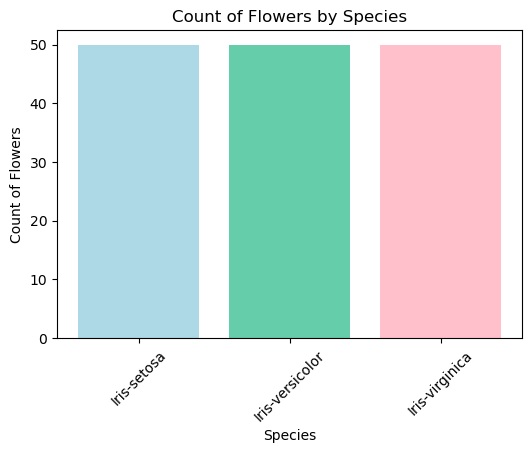

In [50]:
# Count of Flowers by Species
flowers_count_by_species = df['Species'].value_counts()

# Colours for Each Species
colours =['lightblue', 'mediumaquamarine', 'pink']

#Creating Bar Chart
plt.figure(figsize=(6,4))
plt.bar(flowers_count_by_species.index, flowers_count_by_species.values, color=colours)
plt.title('Count of Flowers by Species')
plt.xlabel('Species')
plt.ylabel('Count of Flowers')
plt.xticks(rotation=45)
plt.show()

# **Summary of Each Variable**

***

In [12]:
#Summary of Each Variable - Single Text File: 

#Calculating summary statistics for each variable
summary = df.describe()

#Format the summary information
summary_text = summary.to_string()

#Write the summary to a text file
with open("variable_summary.txt", "w") as file:
    file.write(summary_text)
print("Summary of variables written to 'variable_summary.txt' file.")

Summary of variables written to 'variable_summary.txt' file.


# **Histogram of Each Variable**

***

In [44]:
#Defining the output folder for histograms
output_folder = 'histograms'

def save_histograms(df, output_folder):

    #Defining colours for each Histogram
    colours = ['mediumaquamarine', 'pink', 'lightblue', 'mediumorchid']

    #Loop through each column in the dataset
    for column in df.columns: 
        #Create a histogram for the varibale and save it is a PNG file
        df[column].plot(kind='hist', bins=10, color=colours[i % len(colours)]) #Not showing in the folder? REVIEW!!
        plt.title(f'Histograms of {column}')
        plt.xlabel(column)
        plt.ylabel('Frequency')
        plt.grid(True) #Not showing either?
        plt.savefig(f'{output_folder}/{column}_histogram.png')
        plt.close()
print("Histograms of variables output to 'histograms' file.")


Histograms of variables output to 'histograms' file.


# **Scatter Plot of Each Variable**

***

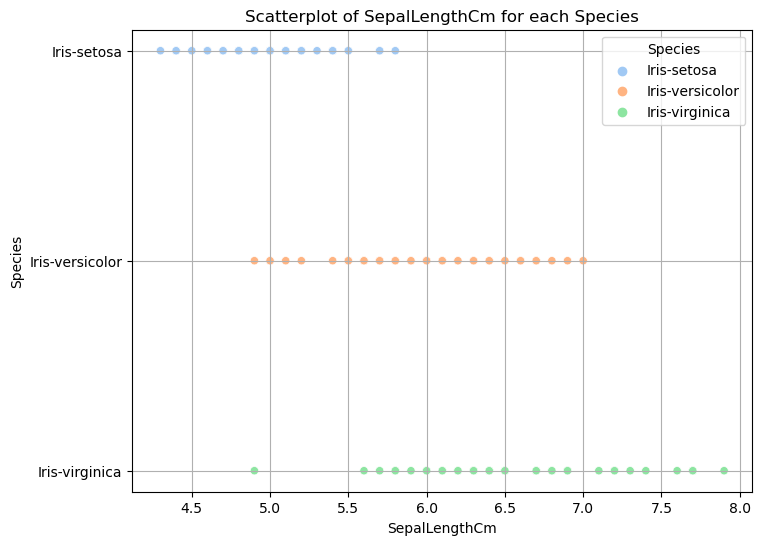

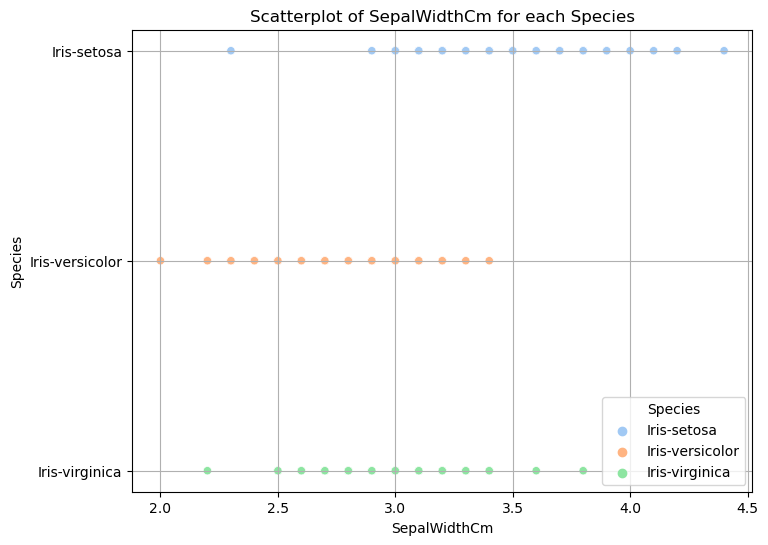

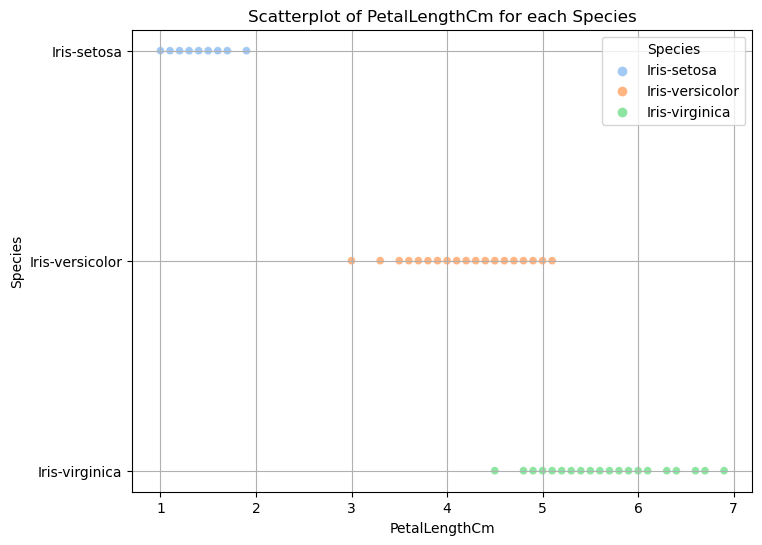

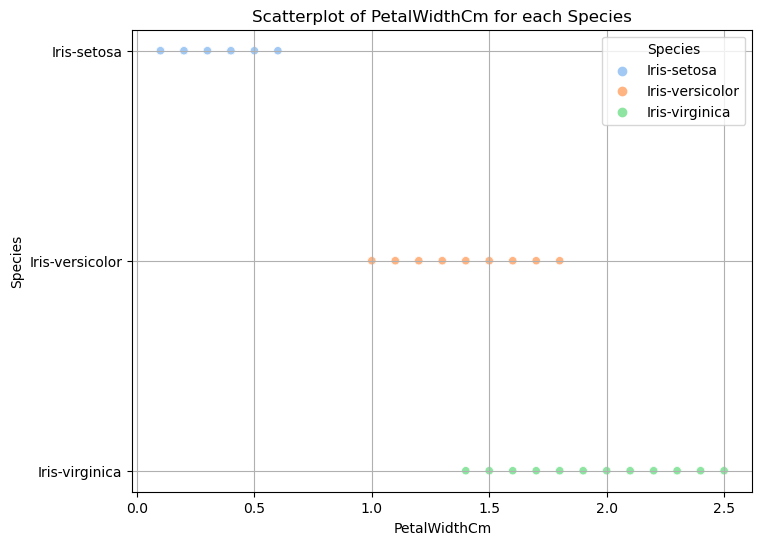

In [46]:
#Scatter Plot for Each Variable

for column in df.columns[:-1]: #Species Column Excluded
    plt.figure(figsize=(8,6))
    sns.scatterplot(data=df, x=column, y='Species', hue='Species', palette='pastel')
    plt.title(f"Scatterplot of {column} for each Species")
    plt.xlabel(column)
    plt.ylabel("Species")
    plt.grid() #Maybe adjust linestyle - review this
    plt.show()

### **Key Insights**

- **Iris Setosa:** Typically exhibits the shortest sepal lengths. They tends to have the widest sepal widths, occasionally with some outliers. Petal lengths are relatively short, ranging between approximately 1-2cm, and they usually have the smallest petal width among the three species.

- **Iris Versicolor:** Shows intermediate values for sepal length, intersecting with both other species in terms of length. They tends to have the narrowest sepal widths among the three species. For petal measurements, they usually fall in the middle range, with some overlap with Iris Virginica for petal length and width.

- **Iris Virginica:** Typically displays the largest measurements for all variables. Notably, the readings for sepal widths is quite varied.

In terms of pattern recognition and classification tasks here are some further insights based on the brief analysis above: 

- **Overlapping Features:** Identifying areas of overlap between species in features shows a potential challenge for classification. For example, the slight crossover in Sepal Length and Petal measurements between Iris Versicolor and Iris Virginica suggests that distingushing between these two species may require a different method or??? (REVIEW)

- **Feature Importance:** 

***

# **Correlation Analysis: Examining Relationship Between Variables**

***

### **Sepal Width vs Sepal Length:**

Let's compare the relationship between Sepal Width and Sepal Length in our Fisher Iris dataset. 

Our aim for this analysis is to identify any possible correlation between these two variables. 

In [29]:
#Calculating Pearson correlation coefficient
correlation = df['SepalWidthCm'].corr(df['SepalLengthCm'])

#Print the correlatino coefficent
print("Pearson correlation coefficient:", correlation)

Pearson correlation coefficient: -0.10936924995064935


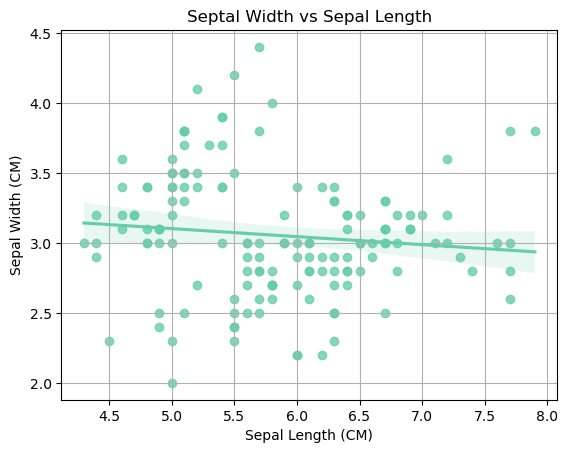

In [35]:
##Scatter Plot with Regression Line for Sepal Width vs Sepal Length
sns.regplot(x='SepalLengthCm', y='SepalWidthCm', data=df, color='mediumaquamarine')
plt.title('Septal Width vs Sepal Length')
plt.xlabel('Sepal Length (CM)')
plt.ylabel('Sepal Width (CM)')
plt.grid()
plt.show()

Based on our initial inspection, we can see a negative correlation between these two variables. The scattered distribution of points around the regression line indicates a weaker correlation. Let's seperate by Species and assess the impact on correlation. 

In [39]:
#Calculate Pearson correlation coefficient for Iris Setosa
setosa_correlation = df[df['Species'] == 'Iris-setosa']['SepalWidthCm'].corr(df[df['Species'] == 'Iris-setosa']['SepalLengthCm'])

#Calculate Pearson correlation coefficient for Iris Versicolor
versicolor_correlation = df[df['Species'] == 'Iris-versicolor']['SepalWidthCm'].corr(df[df['Species'] == 'Iris-versicolor']['SepalLengthCm'])

#Calculate Pearson correlation coefficient for Iris Virginica
viriginica_correlation = df[df['Species'] == 'Iris-virginica']['SepalWidthCm'].corr(df[df['Species'] == 'Iris-virginica']['SepalLengthCm'])


#Print the correlation coefficients for Sepal Width vs Sepal Lenggth
print("Pearson correlation coefficient for Sepal Width vs Sepal Lenggth - Iris Setosa:", setosa_correlation)
print("Pearson correlation coefficient for Sepal Width vs Sepal Lenggth - Iris Versicolor:", versicolor_correlation)
print("Pearson correlation coefficient for Sepal Width vs Sepal Lenggth - Iris Virginica:", viriginica_correlation)

Pearson correlation coefficient for Sepal Width vs Sepal Lenggth - Iris Setosa: 0.7467803732639268
Pearson correlation coefficient for Sepal Width vs Sepal Lenggth - Iris Versicolor: 0.5259107172828247
Pearson correlation coefficient for Sepal Width vs Sepal Lenggth - Iris Virginica: 0.457227816394113


c:\Users\brian\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


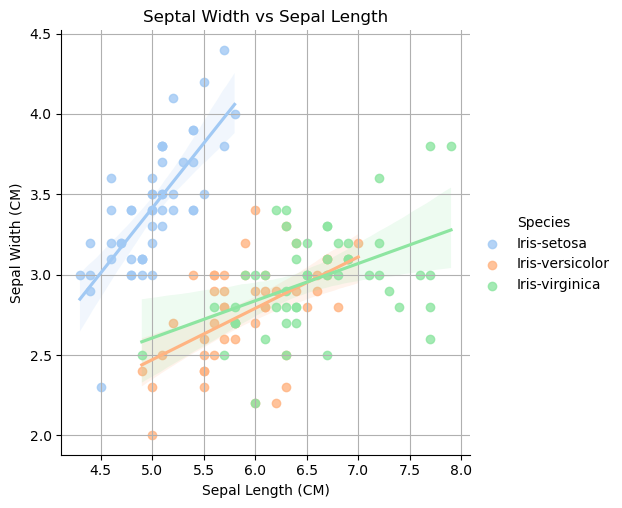

In [17]:
# lmplot seperated by Species

sns.lmplot(x='SepalLengthCm', y='SepalWidthCm', data=df, hue='Species', palette='pastel')
plt.title('Septal Width vs Sepal Length')
plt.xlabel('Sepal Length (CM)')
plt.ylabel('Sepal Width (CM)')
plt.grid()
plt.show()

#### **Petal Width vs Petal Length:**

In [42]:
#Calculating Pearson correlation coefficient
correlation = df['PetalWidthCm'].corr(df['PetalLengthCm'])

#Print the correlatino coefficent
print("Pearson correlation coefficient:", correlation)

Pearson correlation coefficient: 0.9627570970509662


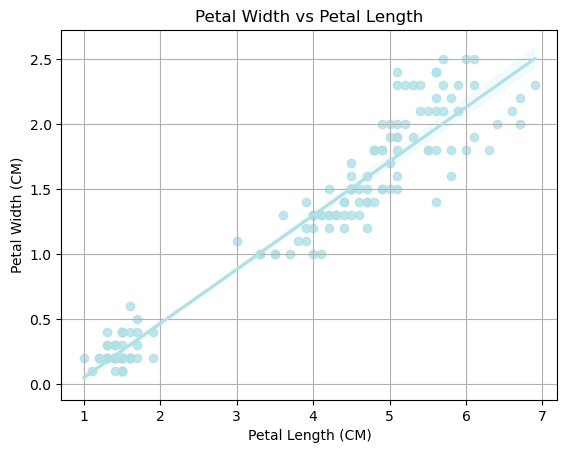

In [43]:
# Scatter Plot with Regression Line for Petal Width vs Petal Length

sns.regplot(x='PetalLengthCm', y='PetalWidthCm', data=df, color='powderblue')
plt.title('Petal Width vs Petal Length')
plt.xlabel('Petal Length (CM)')
plt.ylabel('Petal Width (CM)')
plt.grid()
plt.show()

In [40]:
#Calculate Pearson correlation coefficient for Iris Setosa
setosa_correlation = df[df['Species'] == 'Iris-setosa']['PetalWidthCm'].corr(df[df['Species'] == 'Iris-setosa']['PetalLengthCm'])

#Calculate Pearson correlation coefficient for Iris Versicolor
versicolor_correlation = df[df['Species'] == 'Iris-versicolor']['PetalWidthCm'].corr(df[df['Species'] == 'Iris-versicolor']['PetalLengthCm'])

#Calculate Pearson correlation coefficient for Iris Virginica
viriginica_correlation = df[df['Species'] == 'Iris-virginica']['PetalWidthCm'].corr(df[df['Species'] == 'Iris-virginica']['PetalLengthCm'])


#Print the correlation coefficients for Petal Width vs Petal Length
print("Pearson correlation coefficient for Petal Width vs Petal Length - Iris Setosa:", setosa_correlation)
print("Pearson correlation coefficient for Petal Width vs Petal Length - Iris Versicolor:", versicolor_correlation)
print("Pearson correlation coefficient for Petal Width vs Petal Length - Iris Virginica:", viriginica_correlation)

Pearson correlation coefficient for Petal Width vs Petal Length - Iris Setosa: 0.3063082111580356
Pearson correlation coefficient for Petal Width vs Petal Length - Iris Versicolor: 0.7866680885228168
Pearson correlation coefficient for Petal Width vs Petal Length - Iris Virginica: 0.32210821590031835


c:\Users\brian\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


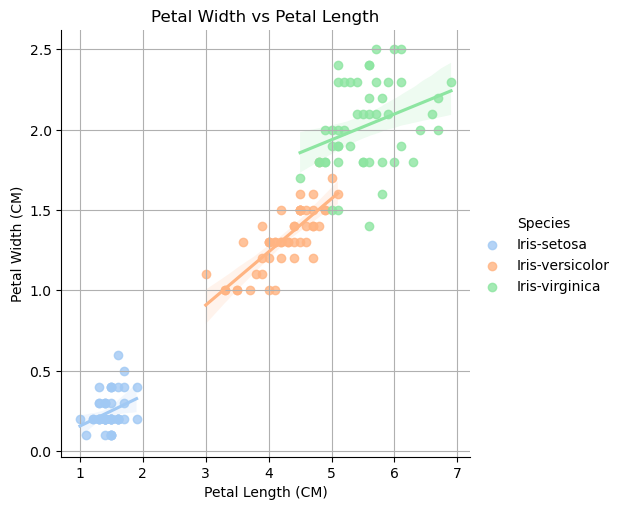

In [20]:
# lmplot seperated by Species

#Scatter Plots 

sns.lmplot(x='PetalLengthCm', y='PetalWidthCm', data=df, hue='Species', palette='pastel')
plt.title('Petal Width vs Petal Length')
plt.xlabel('Petal Length (CM)')
plt.ylabel('Petal Width (CM)')
plt.grid()
plt.show()

***

# **Conclusion:**

***

***
### End